In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\DELL\AppData\Local\Temp\pip-install-kdyausow\tensorflow-gpu_276e707d3195486884c4c8c1e555cc44\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-b

In [3]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.12.0'

# Artificial Neural Network Application

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
dataset = pd.read_csv('D:/D16data1.csv')
#dataset

In [8]:
dataset.shape

(10000, 14)

In [9]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

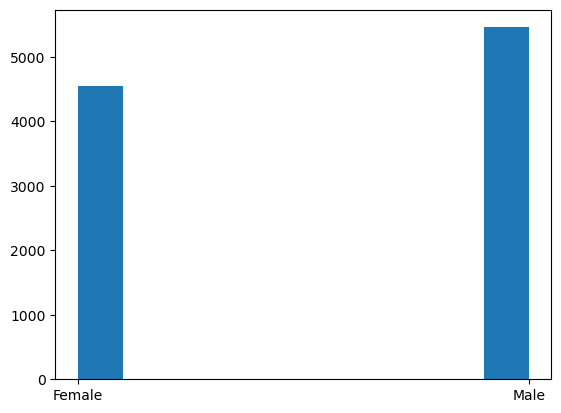

In [14]:
plt.hist(x=dataset.Gender)
plt.show()

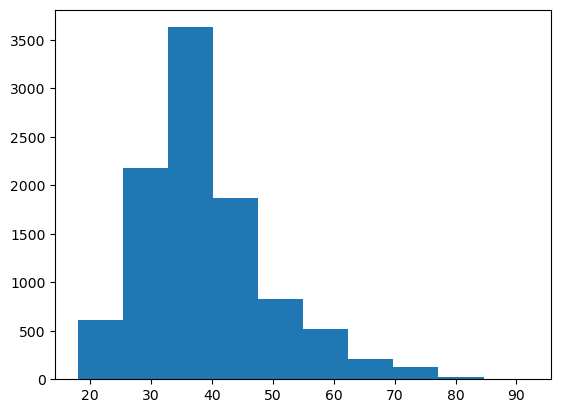

In [15]:
plt.hist(x=dataset.Age)
plt.show()

In [16]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

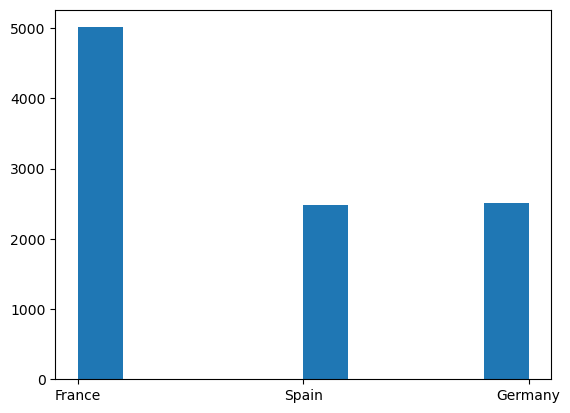

In [17]:
plt.hist(x=dataset.Geography)
plt.show()

In [18]:
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [19]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [20]:
#Convert categorical data
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
X[:,1] = la.fit_transform(X[:,1])

In [21]:
X[:,2] = la.fit_transform(X[:,2])

In [22]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Model Building for ANN

In [26]:
#Initialize the ANN
ann = tf.keras.models.Sequential()

In [27]:
#Adding the input layer and the hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [28]:
#adding the hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [29]:
#adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [30]:
#Compiling the ANN model
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the ANN model

In [31]:
ann.fit(X_train,y_train,batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.7826
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7958
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8034
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8124
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8210
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8254
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8289
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4078 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8551
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8555
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8543
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8540
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8547
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8547
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8558
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8551
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.8553
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 

In [32]:
y_pred = ann.predict(X_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.1661034 ],
       [0.40225315],
       [0.26399872],
       ...,
       [0.25004938],
       [0.1189109 ],
       [0.08977267]], dtype=float32)

In [35]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
cm

array([[1532,  217],
       [  63,  188]], dtype=int64)

In [39]:
accuracy_score(y_pred,y_test)

0.86